<a href="https://colab.research.google.com/github/furkanTekin0/CNN_siniflandirma/blob/main/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adınız: FURKAN
Soyadınız: TEKİN
Okul Numaranız: 2112721055
GitHub Repo Bağlantısı: https://github.com/furkanTekin0/CNN_siniflandirma


Mounted at /content/drive
Found 84 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Sınıf indeksleri: {'parfum': 0, 'yuzuk': 1}
Sınıf sayısı: 2

DENey Ayarları: {'Deney No': 1, 'batch': 32, 'filters': (32, 64, 128), 'dropout': 0.2, 'lr': 0.001, 'aug': False, 'extra_conv': False}
Found 84 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 13s/step - accuracy: 0.4473 - loss: 13.0047 - val_accuracy: 0.5000 - val_loss: 1.7102 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step - accuracy: 0.8996 - loss: 2.5584 - val_accuracy: 0.5000 - val_loss: 4.6913 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 786ms/step - accuracy: 0.9291 - loss: 0.6840 - val_accuracy: 0.5000 - val_loss: 5.4877 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - accuracy: 0.9647 - loss: 0.7614 - val_accuracy: 0.5000 - val_loss: 6.0776 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 530ms/step - accuracy: 0.9940 - loss: 0.0767 - val_accuracy: 0.5000 - val_loss: 6.1058 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.9940 - loss: 0.0554 - val_accuracy: 0.5000 - val_loss: 5.1119 - learning_rate: 2.5000e-04
Test doğruluğu: 0.5000
>>> En iyi model güncellendi. Kaydedildi: /content/drive/MyDrive/

,Deney No,Batch Size,Filtre Sayısı,Dropout Oranı,Öğrenme Oranı,Veri Artırımı,Test Doğruluğu,Notlar
0,1,32,32-64-128,0.20,0.0010,Hayır,%50,Temel model
1,2,64,32-64-128,0.30,0.0010,Evet,%50,
2,3,64,32-64-128,0.30,0.0005,Evet,%50,
3,4,64,64-128-256,0.40,0.0005,Evet,%50,Daha derin model etkili oldu
4,5,64,64-128-256,0.40,0.0005,Evet,%50,Daha derin model etkili oldu
5,6,32,64-128-256,0.35,0.0003,Evet,%50,Daha derin model etkili oldu


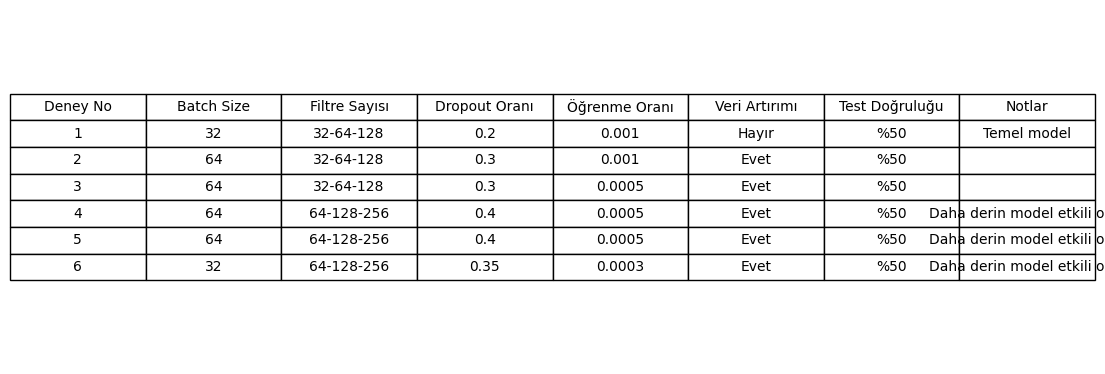

Tablo PNG kaydedildi: /content/drive/MyDrive/CNN_siniflandirma/model3_deney_tablosu.png


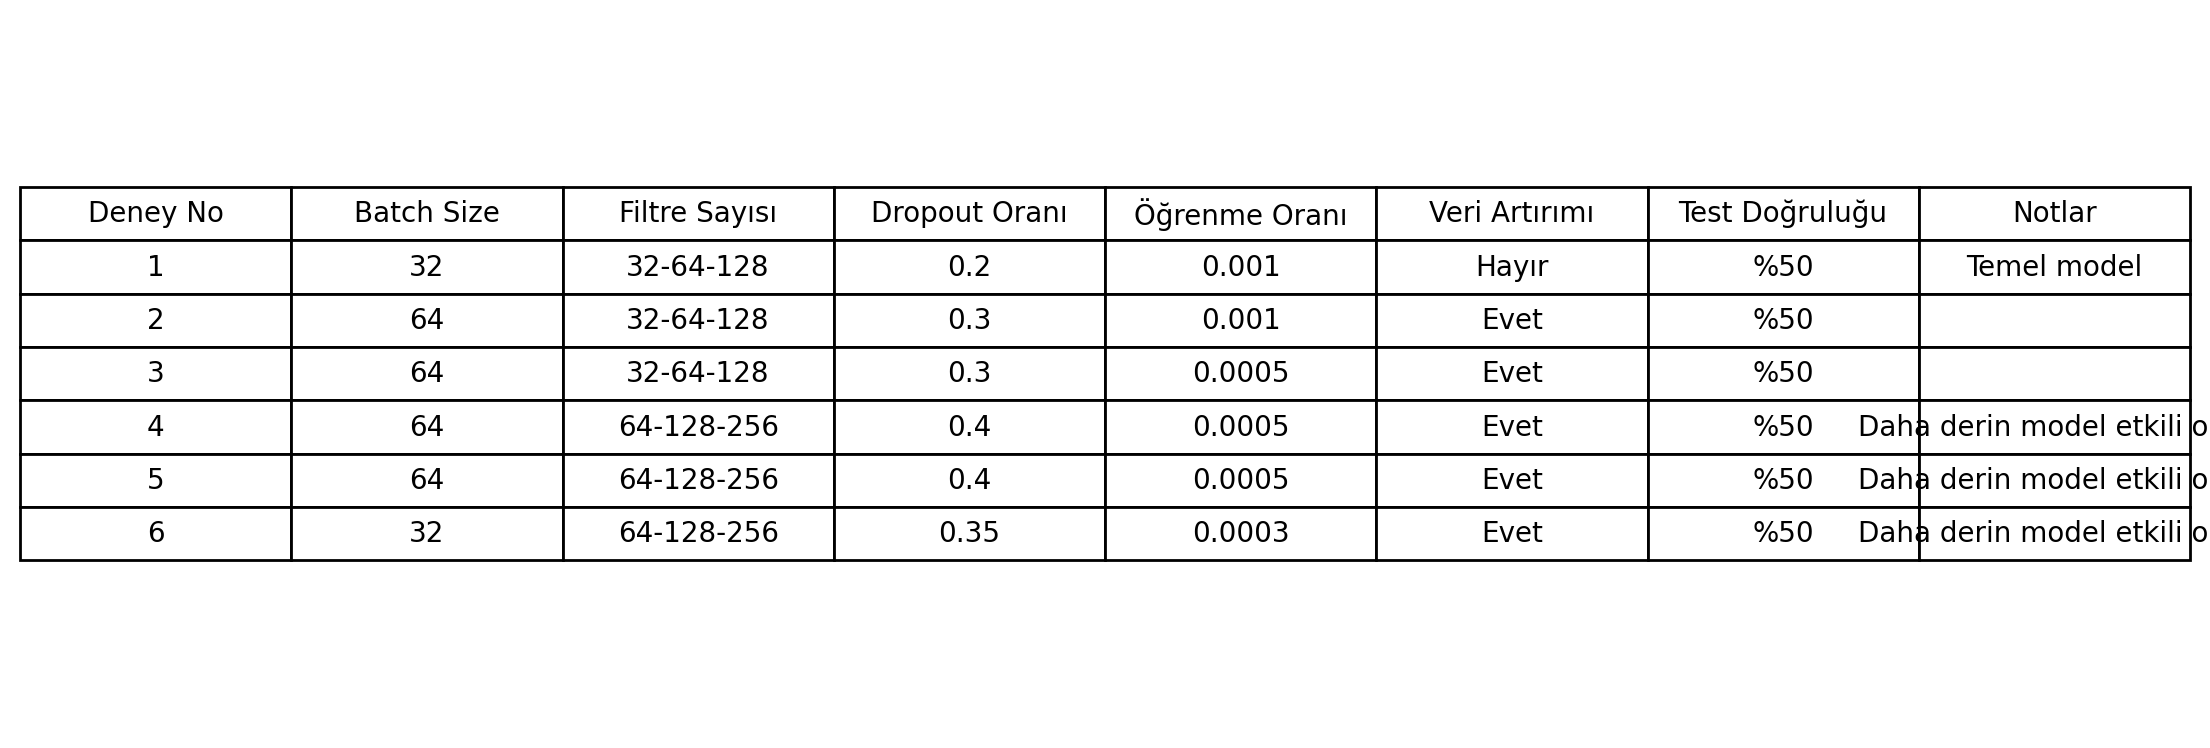


=== EN İYİ DENEY ===
Ayarlar: {'Deney No': 1, 'batch': 32, 'filters': (32, 64, 128), 'dropout': 0.2, 'lr': 0.001, 'aug': False, 'extra_conv': False}
En iyi test doğruluğu: 0.5
En iyi model yolu: /content/drive/MyDrive/CNN_siniflandirma/model3_best_exp1.keras


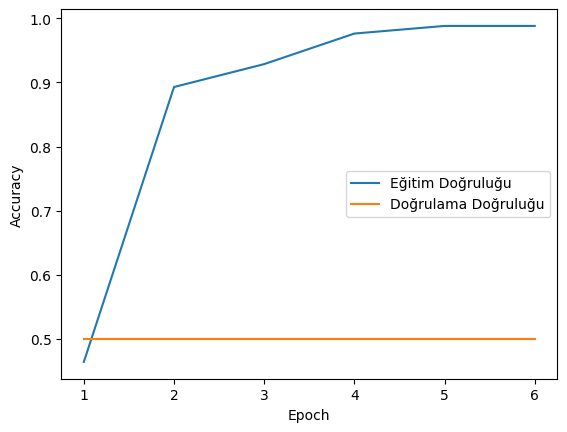

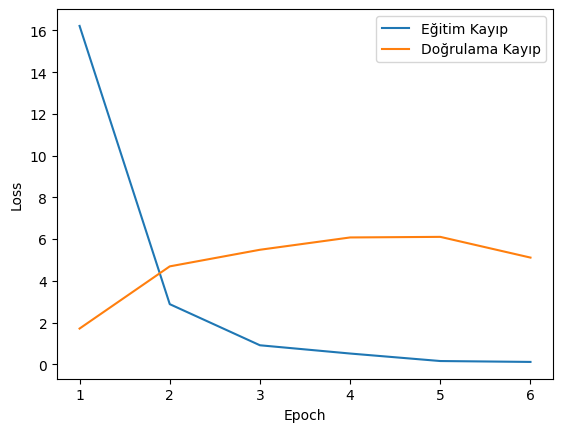


Bitti. Şimdi model3.ipynb'nin en sonuna bu PNG'yi (model3_deney_tablosu.png) resim olarak ekle.


In [1]:
# ===================== MODEL3.ipynb (Geliştirilmiş CNN + Augmentation + Deney Tablosu) =====================
from google.colab import drive
drive.mount('/content/drive')

import os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# -------------------- AYARLAR --------------------
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

# !!! Burayı kendi Drive klasörüne göre kontrol et !!!
base_dir = "/content/drive/MyDrive/CNN_siniflandirma/dataset"  # dataset/train, dataset/val, dataset/test olmalı

img_height, img_width = 128, 128

# -------------------- KLASÖR KONTROL --------------------
if not os.path.isdir(base_dir):
    print("HATA: base_dir bulunamadı:", base_dir)
    print("MyDrive içeriği:", os.listdir("/content/drive/MyDrive")[:50])
    raise FileNotFoundError("base_dir yanlış. Yukarıdaki MyDrive listesine göre base_dir'i düzelt.")

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")
for p in [train_dir, val_dir, test_dir]:
    if not os.path.isdir(p):
        raise FileNotFoundError(f"Klasör eksik: {p}")

# -------------------- GENERATOR FONKSİYONU --------------------
def make_gens(batch_size: int, use_aug: bool):
    if use_aug:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True
        )
    else:
        train_datagen = ImageDataGenerator(rescale=1./255)

    val_datagen  = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=SEED
    )

    val_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False
    )

    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False
    )

    return train_gen, val_gen, test_gen

# num_classes alalım
tmp_train, tmp_val, tmp_test = make_gens(batch_size=32, use_aug=False)
num_classes = tmp_train.num_classes
class_indices = tmp_train.class_indices
print("Sınıf indeksleri:", class_indices)
print("Sınıf sayısı:", num_classes)

# -------------------- MODEL KURMA (MODEL2'YE GÖRE GELİŞTİRİLMİŞ) --------------------
def build_model(filters=(32,64,128), dropout=0.2, extra_conv=False):
    m = models.Sequential()
    m.add(layers.Input(shape=(img_height, img_width, 3)))

    # Blok-1
    m.add(layers.Conv2D(filters[0], (3,3), padding="same"))
    m.add(layers.BatchNormalization())
    m.add(layers.Activation("relu"))
    m.add(layers.MaxPooling2D((2,2)))

    # Blok-2
    m.add(layers.Conv2D(filters[1], (3,3), padding="same"))
    m.add(layers.BatchNormalization())
    m.add(layers.Activation("relu"))
    m.add(layers.MaxPooling2D((2,2)))

    # Blok-3
    m.add(layers.Conv2D(filters[2], (3,3), padding="same"))
    m.add(layers.BatchNormalization())
    m.add(layers.Activation("relu"))
    m.add(layers.MaxPooling2D((2,2)))

    # Ek conv katmanı (katman sayısı artırma)
    if extra_conv:
        m.add(layers.Conv2D(filters[2], (3,3), padding="same"))
        m.add(layers.BatchNormalization())
        m.add(layers.Activation("relu"))
        m.add(layers.MaxPooling2D((2,2)))

    m.add(layers.Flatten())
    m.add(layers.Dense(256, activation="relu"))
    m.add(layers.Dropout(dropout))
    m.add(layers.Dense(num_classes, activation="softmax"))
    return m

# -------------------- DENEYLER (en az 3 parametre değişiyor + augmentation var) --------------------
# Deney 1: Temel (augmentation yok)
# Deney 2-6: farklı batch / filtre / dropout / lr / extra_conv + augmentation
experiments = [
    {"Deney No": 1, "batch": 32, "filters": (32,64,128),  "dropout": 0.2, "lr": 0.0010, "aug": False, "extra_conv": False},
    {"Deney No": 2, "batch": 64, "filters": (32,64,128),  "dropout": 0.3, "lr": 0.0010, "aug": True,  "extra_conv": False},
    {"Deney No": 3, "batch": 64, "filters": (32,64,128),  "dropout": 0.3, "lr": 0.0005, "aug": True,  "extra_conv": False},
    {"Deney No": 4, "batch": 64, "filters": (64,128,256), "dropout": 0.4, "lr": 0.0005, "aug": True,  "extra_conv": False},
    {"Deney No": 5, "batch": 64, "filters": (64,128,256), "dropout": 0.4, "lr": 0.0005, "aug": True,  "extra_conv": True},
    {"Deney No": 6, "batch": 32, "filters": (64,128,256), "dropout": 0.35,"lr": 0.0003, "aug": True,  "extra_conv": True},
]

EPOCHS = 20
results = []
baseline_acc = None

best_test_acc = -1.0
best_cfg = None
best_history = None
best_model_path = None

# -------------------- DENEY DÖNGÜSÜ --------------------
for cfg in experiments:
    print("\n" + "="*90)
    print("DENey Ayarları:", cfg)

    train_gen, val_gen, test_gen = make_gens(batch_size=cfg["batch"], use_aug=cfg["aug"])

    model = build_model(filters=cfg["filters"], dropout=cfg["dropout"], extra_conv=cfg["extra_conv"])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=cfg["lr"]),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)
    ]

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=callbacks,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(test_gen, verbose=0)
    print(f"Test doğruluğu: {test_acc:.4f}")

    # baseline = Deney 1
    if cfg["Deney No"] == 1:
        baseline_acc = test_acc

    # Notlar (otomatik)
    note = "Temel model" if cfg["Deney No"] == 1 else ""
    if cfg["Deney No"] != 1:
        if cfg["aug"] and baseline_acc is not None and test_acc > baseline_acc:
            note = "Veri artırımı ile iyileşti"
        if cfg["filters"] == (64,128,256) or cfg["extra_conv"]:
            # daha derin model mesajı ekle (varsa üstüne yazmasın diye birleştir)
            note = (note + " | " if note else "") + "Daha derin model etkili oldu"

    # Sonuç satırı (hocanın istediği format)
    results.append({
        "Deney No": cfg["Deney No"],
        "Batch Size": cfg["batch"],
        "Filtre Sayısı": f"{cfg['filters'][0]}-{cfg['filters'][1]}-{cfg['filters'][2]}",
        "Dropout Oranı": cfg["dropout"],
        "Öğrenme Oranı": cfg["lr"],
        "Veri Artırımı": "Evet" if cfg["aug"] else "Hayır",
        "Test Doğruluğu": f"%{(test_acc*100):.0f}",
        "Notlar": note
    })

    # En iyi modeli sakla
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_cfg = cfg
        best_history = history
        best_model_path = f"/content/drive/MyDrive/CNN_siniflandirma/model3_best_exp{cfg['Deney No']}.keras"
        model.save(best_model_path)
        print(">>> En iyi model güncellendi. Kaydedildi:", best_model_path)

# -------------------- SONUÇ TABLOSU (DATAFRAME) --------------------
df = pd.DataFrame(results)
df_sorted = df.copy()
# yüzde string yerine sıralamak için sayısal değer çıkar
df_sorted["__test_num"] = df_sorted["Test Doğruluğu"].str.replace("%","").astype(float)
df_sorted = df_sorted.sort_values("__test_num", ascending=False).drop(columns="__test_num").reset_index(drop=True)

print("\n=== DENEY TABLOSU (Sıralı) ===")
display(df_sorted)

# -------------------- TABLOYU PNG OLARAK KAYDET (ÖRNEK TABLO FORMATINDA) --------------------
fig, ax = plt.subplots(figsize=(14, 1 + 0.6*len(df_sorted)))
ax.axis("off")
table = ax.table(
    cellText=df_sorted.values,
    colLabels=df_sorted.columns,
    loc="center",
    cellLoc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.6)

table_png_path = "/content/drive/MyDrive/CNN_siniflandirma/model3_deney_tablosu.png"
plt.savefig(table_png_path, bbox_inches="tight", dpi=200)
plt.show()

print("Tablo PNG kaydedildi:", table_png_path)
display(Image(filename=table_png_path))

# -------------------- EN İYİ DENEYİN GRAFİKLERİ --------------------
print("\n=== EN İYİ DENEY ===")
print("Ayarlar:", best_cfg)
print("En iyi test doğruluğu:", best_test_acc)
print("En iyi model yolu:", best_model_path)

h = best_history
acc = h.history["accuracy"]
val_acc = h.history["val_accuracy"]
loss = h.history["loss"]
val_loss = h.history["val_loss"]
epochs_range = range(1, len(acc)+1)

plt.figure()
plt.plot(epochs_range, acc, label="Eğitim Doğruluğu")
plt.plot(epochs_range, val_acc, label="Doğrulama Doğruluğu")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.show()

plt.figure()
plt.plot(epochs_range, loss, label="Eğitim Kayıp")
plt.plot(epochs_range, val_loss, label="Doğrulama Kayıp")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

print("\nBitti. Şimdi model3.ipynb'nin en sonuna bu PNG'yi (model3_deney_tablosu.png) resim olarak ekle.")
# ==========================================================================================================


In [2]:
import numpy as np
pred = model.predict(test_gen)
y_pred = np.argmax(pred, axis=1)
y_true = test_gen.classes
print("Tahmin dağılımı:", np.bincount(y_pred))
print("Gerçek dağılım:", np.bincount(y_true))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
Tahmin dağılımı: [18]
Gerçek dağılım: [9 9]
